In [58]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [6]:
os.getcwd()

'/home/student/Dokumente/moonsoon_nepal'

In [54]:
streak = 6
src = os.path.join(os.getcwd(), 'moonsoon_src','moonsoon with streak of {}'.format(streak))
path = os.path.join(src, '*.txt')
files = glob.glob(path)
for file in files:
    df = pd.read_csv(file)
    df
    df['duration'] = df.lastday - df.firstday
    break

In [55]:
df

,year,firstday,lastday,duration
0,2015,98,282,184
1,2016,173,276,103
2,2017,149,279,130
3,2018,177,270,93
4,2019,158,284,126
...,...,...,...,...
81,2096,147,265,118
82,2097,182,296,114
83,2098,182,363,181
84,2099,153,266,113


In [88]:
pd.date

<module 'pandas' from '/home/student/miniconda3/lib/python3.9/site-packages/pandas/__init__.py'>

In [89]:
np.arange(0, 365, 30)

array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330, 360])

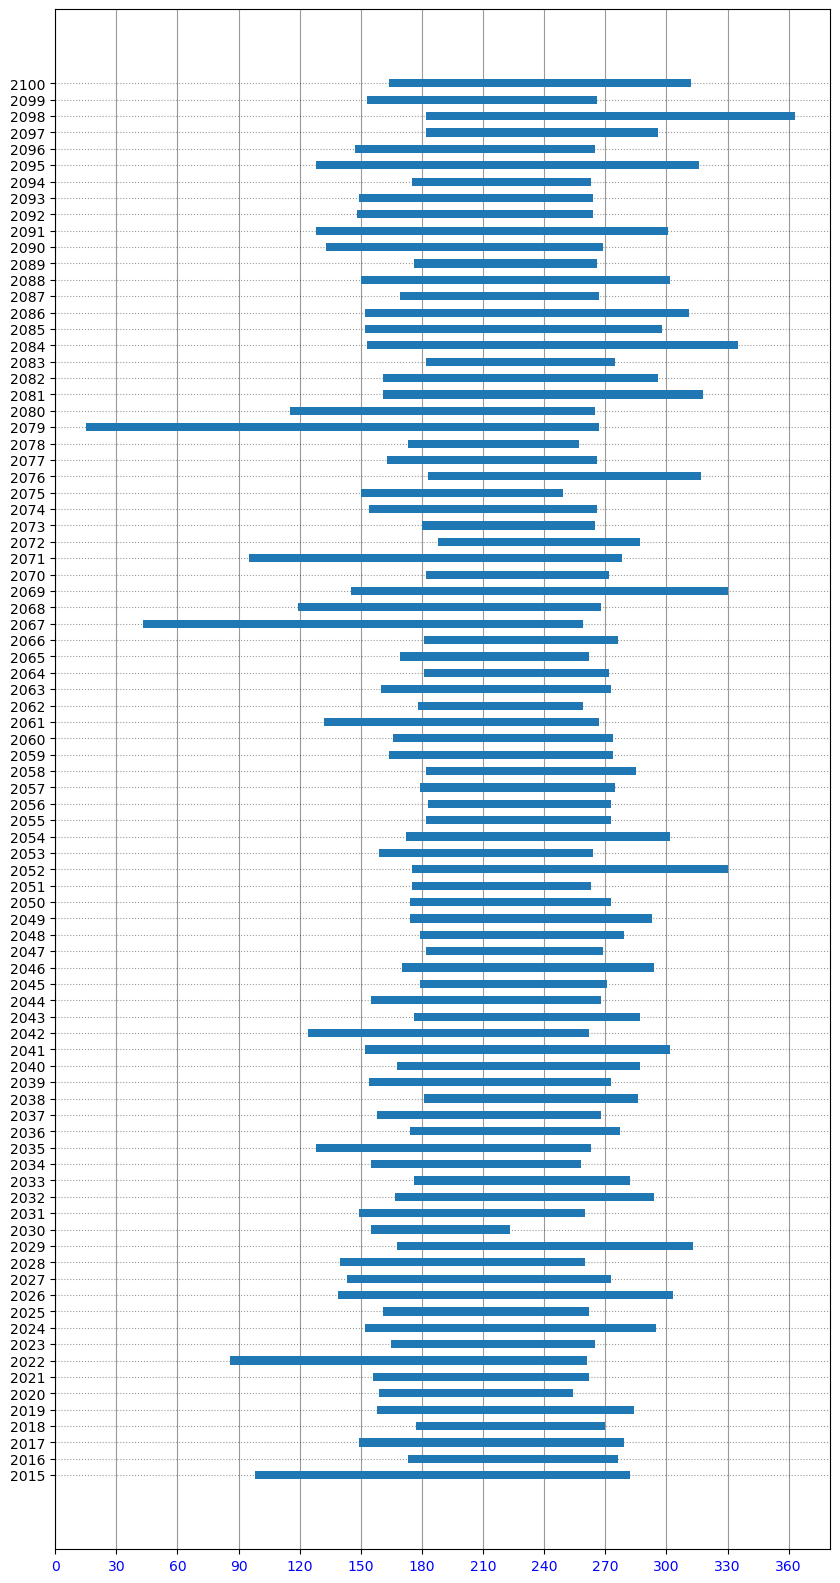

In [103]:
fig, ax = plt.subplots(1, figsize=(10,20))
ax.barh(df.year, df.duration, left=df.firstday, height = 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='k', linestyle='solid', alpha=0.4, which='both')
ax.yaxis.grid(color='k', linestyle='dotted', alpha=0.4, which='both')
#ticks
xticks = np.arange(0, 365, 30)
xticks_labels = np.arange(0, 365, 30)
xticks_minor = np.arange(0, 365, 30)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels, color='b')
ax.set_yticks(df.year)
plt.show()